In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Transforming data

In [85]:
#Import data
df = pd.read_csv('1-bundesliga.csv')

#Creating a list with german club names
teams_arr = df['club_name'].unique()
teams = teams_arr.tolist()

#Filtering receiver clubs only to German clubs
german_df = df[df['club_involved_name'].isin(teams)]

#Dropping unnecessary columns
cols_to_drop = ['player_name', 'age', 'position', 'fee', 'transfer_movement', 'transfer_period', 'fee_cleaned', 'league_name', 'country']
german_df = german_df.drop(columns=cols_to_drop)

#Assigning ID-s to the teams
id_teams = {i + 1: element for i, element in enumerate(teams)}
id_teams = {value: key for key, value in id_teams.items()}

# Replace the values in the data with ID-s from the dictionary
german_df['club_name'] = german_df['club_name'].map(id_teams)
german_df['club_involved_name'] = german_df['club_involved_name'].map(id_teams)
german_df = german_df.rename(columns={'club_name':'source', 'club_involved_name':'target'})

# Create the edgeslist df
edges = german_df.groupby(['source', 'target']).size().reset_index(name='weight')
print(edges)

     source  target  weight
0         1       7       1
1         1       8       1
2         1       9       1
3         1      21       1
4         2      10       1
..      ...     ...     ...
499      44      28       5
500      44      29       1
501      44      33       4
502      44      34       5
503      44      37       5

[504 rows x 3 columns]


In [86]:
#Creating the graph
G = nx.from_pandas_edgelist(edges, 'source', 'target', ['weight'])
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 44
Number of edges: 391
Average degree:  17.7727


# Visualising the network

In [87]:
#Creating an id-team dictionary
id_teams = {value: key for key, value in id_teams.items()}
id_teams

{1: '1.FC Saarbrücken',
 2: 'SG Wattenscheid 09',
 3: 'Bayer 05 Uerdingen',
 4: 'SV Werder Bremen',
 5: 'VfL Bochum',
 6: 'VfB Stuttgart',
 7: 'Karlsruher SC',
 8: 'Hamburger SV',
 9: 'FC Schalke 04',
 10: 'Bayern Munich',
 11: 'Eintracht Frankfurt',
 12: 'Borussia Mönchengladbach',
 13: 'Borussia Dortmund',
 14: 'Bayer 04 Leverkusen',
 15: '1.FC Nuremberg',
 16: '1. FC Köln',
 17: '1.FC Kaiserslautern',
 18: 'SG Dynamo Dresden',
 19: 'VfB Leipzig (- 2004)',
 20: 'SC Freiburg',
 21: 'MSV Duisburg',
 22: 'TSV 1860 Munich',
 23: 'FC St. Pauli',
 24: 'KFC Uerdingen 05',
 25: 'FC Hansa Rostock',
 26: 'Fortuna Düsseldorf',
 27: 'Arminia Bielefeld',
 28: 'VfL Wolfsburg',
 29: 'Hertha BSC',
 30: 'SpVgg Unterhaching',
 31: 'SSV Ulm 1846',
 32: 'FC Energie Cottbus',
 33: 'Hannover 96',
 34: '1.FSV Mainz 05',
 35: 'Alemannia Aachen',
 36: 'TSG 1899 Hoffenheim',
 37: 'FC Augsburg',
 38: 'SpVgg Greuther Fürth',
 39: 'Eintracht Braunschweig',
 40: 'SC Paderborn 07',
 41: 'FC Ingolstadt 04',
 42: 'S

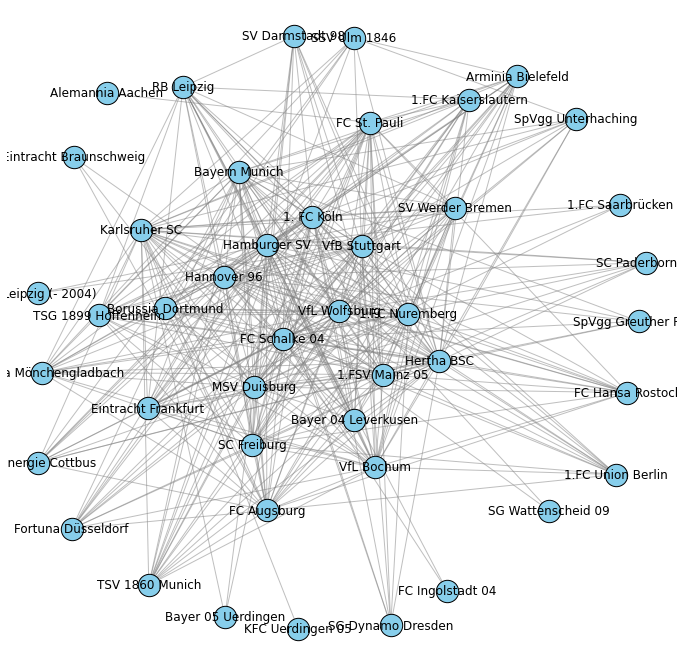

In [88]:
#Plotting the network
fig, ax = plt.subplots(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G, k = 4)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=500, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=id_teams, font_color='black')
plt.axis("off")
plt.show()

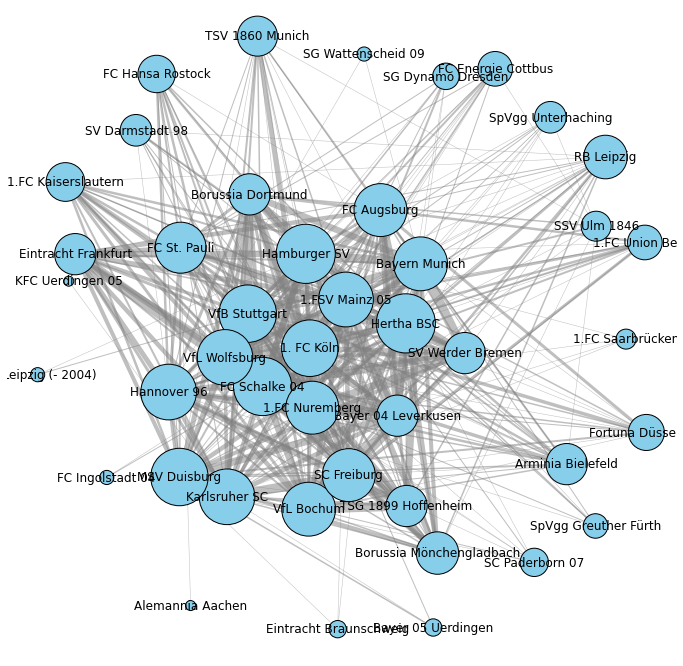

In [103]:
#Plotting the network with weights
edge_weights = [G.edges[u, v]['weight'] for u, v in G.edges()]
node_sizes = [100 * G.degree(node) for node in G.nodes]
edge_widths = [0.5 * weight for weight in edge_weights]
fig, ax = plt.subplots(figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G, k = 4)
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=node_sizes, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.5, width = edge_widths)
nx.draw_networkx_labels(G, pos, labels=id_teams, font_color='black')
plt.axis("off")
plt.show()

# Calculating measures

In [90]:
#Calculating the degree centrality of nodes
degree_centrality = nx.degree_centrality(G)

teams_centrality = {}

for id, value in degree_centrality.items():
    if id in id_teams:
        team = id_teams[id]
        teams_centrality[team] = value

print(teams_centrality)

{'1.FC Saarbrücken': 0.09302325581395349, 'Karlsruher SC': 0.7209302325581395, 'Hamburger SV': 0.813953488372093, 'FC Schalke 04': 0.7906976744186046, 'MSV Duisburg': 0.7674418604651163, 'SG Wattenscheid 09': 0.046511627906976744, 'Bayern Munich': 0.6744186046511628, 'Hannover 96': 0.7209302325581395, 'Bayer 05 Uerdingen': 0.06976744186046512, '1. FC Köln': 0.7441860465116279, 'SV Werder Bremen': 0.3953488372093023, 'VfL Bochum': 0.6744186046511628, 'VfB Stuttgart': 0.7674418604651163, '1.FC Nuremberg': 0.6511627906976745, 'SC Freiburg': 0.6511627906976745, 'FC St. Pauli': 0.6046511627906976, 'VfL Wolfsburg': 0.7209302325581395, 'Hertha BSC': 0.813953488372093, '1.FSV Mainz 05': 0.6976744186046512, 'FC Augsburg': 0.6511627906976745, 'RB Leipzig': 0.4418604651162791, 'SSV Ulm 1846': 0.20930232558139533, 'Eintracht Frankfurt': 0.3953488372093023, 'Borussia Mönchengladbach': 0.41860465116279066, 'Borussia Dortmund': 0.3953488372093023, 'Bayer 04 Leverkusen': 0.3953488372093023, '1.FC Kais

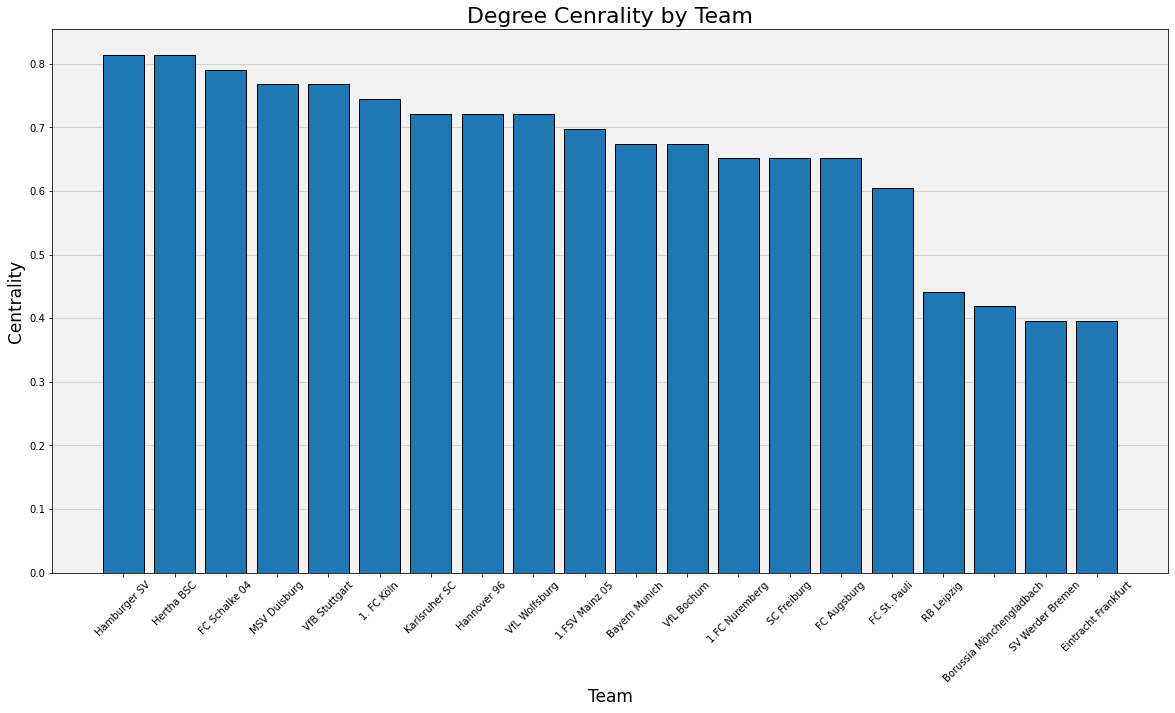

In [91]:
#Plotting the top 20 centrality values
top_teams_centrality = dict(sorted(teams_centrality.items(), key=lambda x: x[1], reverse=True)[:20])

teams = list(top_teams_centrality.keys())
values = list(top_teams_centrality.values())

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(teams, values, color="#1f77b4", edgecolor = 'black', zorder=2)
plt.xlabel('Team', fontsize = 17)
plt.ylabel('Centrality', fontsize = 17)
plt.title('Degree Cenrality by Team', fontsize = 22)
plt.grid(b=True, which='major', axis='y', linewidth=0.5, zorder=1)
plt.xticks(rotation=45)
ax.set_facecolor('#f2f2f2')
plt.show()

In [92]:
#Calculating the weighted betweenness centrality of nodes
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

teams_betweenness = {}

for id, value in betweenness_centrality.items():
    if id in id_teams:
        team = id_teams[id]
        teams_betweenness[team] = value

print(teams_betweenness)

{'1.FC Saarbrücken': 0.014698953071046092, 'Karlsruher SC': 0.10923776604839726, 'Hamburger SV': 0.10388459209057217, 'FC Schalke 04': 0.03727277091064467, 'MSV Duisburg': 0.1292796458494133, 'SG Wattenscheid 09': 0.0015503875968992252, 'Bayern Munich': 0.049661182302378315, 'Hannover 96': 0.06121070082864104, 'Bayer 05 Uerdingen': 0.0, '1. FC Köln': 0.04233347555606692, 'SV Werder Bremen': 0.001318393677197664, 'VfL Bochum': 0.046548921424336705, 'VfB Stuttgart': 0.0188397950025857, '1.FC Nuremberg': 0.0013025365184833623, 'SC Freiburg': 0.022565873894777547, 'FC St. Pauli': 0.09651270656254046, 'VfL Wolfsburg': 0.011543129566385379, 'Hertha BSC': 0.07214517824982941, '1.FSV Mainz 05': 0.015897861828094384, 'FC Augsburg': 0.02773187499101121, 'RB Leipzig': 0.2098318717089481, 'SSV Ulm 1846': 0.07967643129603263, 'Eintracht Frankfurt': 0.0, 'Borussia Mönchengladbach': 0.0049833887043189366, 'Borussia Dortmund': 0.0, 'Bayer 04 Leverkusen': 0.0, '1.FC Kaiserslautern': 0.00099667774086378

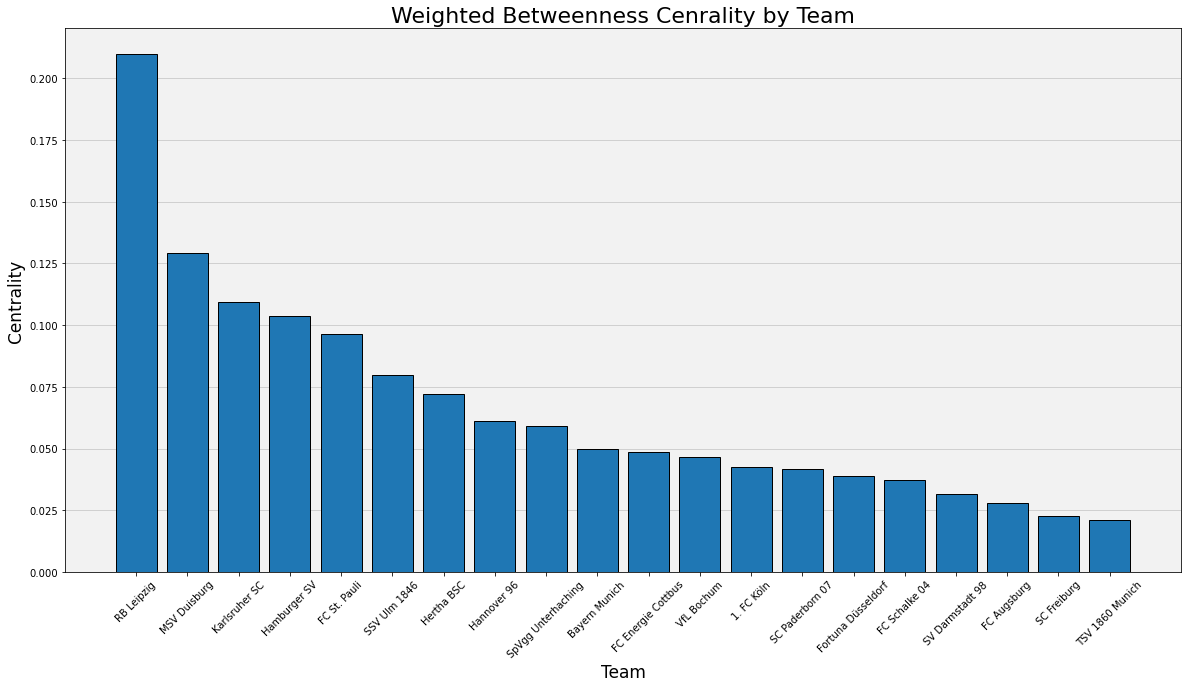

In [93]:
#Plotting the top 20 centrality values
top_teams_betweenness = dict(sorted(teams_betweenness.items(), key=lambda x: x[1], reverse=True)[:20])

teams = list(top_teams_betweenness.keys())
values = list(top_teams_betweenness.values())

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(teams, values, color="#1f77b4", edgecolor = 'black', zorder=2)
plt.xlabel('Team', fontsize = 17)
plt.ylabel('Centrality', fontsize = 17)
plt.title('Weighted Betweenness Cenrality by Team', fontsize = 22)
plt.grid(b=True, which='major', axis='y', linewidth=0.5, zorder=1)
plt.xticks(rotation=45)
ax.set_facecolor('#f2f2f2')
plt.show()

In [94]:
#Calculating the average clustering coefficient and the average shortest path length
avg_cc = nx.average_clustering(G)
avg_spl = nx.average_shortest_path_length(G)

print("Average clustering coefficient:", avg_cc)
print("Average shortest path length:", avg_spl)

Average clustering coefficient: 0.7705655313880755
Average shortest path length: 1.6363636363636365


# Generating simulated networks for comparasion

In [95]:
#Getting the number of nodes and edges from the empirical network
n_edges = len(G.edges())
n_nodes = len(G.nodes())

#Calculating the probability of connection
p = n_edges / (n_nodes * (n_nodes - 1))

#The number of graphs
n_graphs = 100

#Creating empty lists to store the parameters of the simulated networks
er_clus_coef = []
er_short_path = []

#Generating the random networks
for i in range(n_graphs):
    er_graph = nx.erdos_renyi_graph(n_nodes, p)
    
    #Making sure that the network is connected
    while not nx.is_connected(er_graph):
        er_graph = nx.erdos_renyi_graph(n_nodes, p)
    
    #Adding the parameters to the lists
    er_clus_coef.append(nx.average_clustering(er_graph))
    er_short_path.append(nx.average_shortest_path_length(er_graph))
    
#Calculating the the mean and the standard deviation of the two given measures
er_avg_clus_coef = np.mean(er_clus_coef)
er_std_clus_coef = np.std(er_clus_coef)
er_avg_short_path = np.mean(er_short_path)
er_std_short_path = np.std(er_short_path)

print("Average clustering coefficient")
print("Average:", er_avg_clus_coef)
print("Standard deviation:", er_std_clus_coef)
print("---------------------")
print("Average shortest path length")
print("Average:", er_avg_short_path)
print("Standard deviation:", er_std_short_path)

Average clustering coefficient
Average: 0.20612792358414014
Standard deviation: 0.023270679592459296
---------------------
Average shortest path length
Average: 1.924090909090909
Standard deviation: 0.043924464952550264


In [96]:
#Getting the degrees of each node in the empirical network
degrees = [d for n, d in G.degree()]

#Creating empty lists to store the parameters of the simulated networks
cm_clus_coef = []
cm_short_path = []

for i in range(n_graphs):
    
    # Creating a degree sequence for a configuration model based on the degrees of the empirical network
    cm_degrees = degrees.copy()
    
    # Randomly shuffling the degree sequence
    np.random.shuffle(cm_degrees)
    
    # Creating a configuration model based on the shuffled degree sequence
    cm_graph = nx.configuration_model(cm_degrees)
    cm_graph = nx.Graph(cm_graph)
    
    #Making sure that the network is connected
    while not nx.is_connected(cm_graph):
        cm_degrees = degrees.copy()
        np.random.shuffle(cm_degrees)
        cm_graph = nx.configuration_model(cm_degrees)
        cm_graph = nx.Graph(cm_graph)
    
    #Adding the parameters to the lists
    cm_clus_coef.append(nx.average_clustering(cm_graph))
    cm_short_path.append(nx.average_shortest_path_length(cm_graph))

#Calculating the the mean and the standard deviation of the two given measures
cm_avg_clus_coef = np.mean(cm_clus_coef)
cm_std_clus_coef = np.std(cm_clus_coef)
cm_avg_short_path = np.mean(cm_short_path)
cm_std_short_path = np.std(cm_short_path)

print("Average clustering coefficient")
print("Average:", cm_avg_clus_coef)
print("Standard deviation:", cm_std_clus_coef)
print("---------------------")
print("Average shortest path length")
print("Average:", cm_avg_short_path)
print("Standard deviation:", cm_std_short_path)

Average clustering coefficient
Average: 0.43923005299725787
Standard deviation: 0.033168413851894576
---------------------
Average shortest path length
Average: 1.8378329809725154
Standard deviation: 0.0186371131125386


In [97]:
#Calculating z-scores
zscore_er_cc = (avg_cc - er_avg_clus_coef) / er_std_clus_coef
zscore_cm_cc = (avg_cc - cm_avg_clus_coef) / cm_std_clus_coef
zscore_er_spl = (avg_spl - er_avg_short_path) / er_std_short_path
zscore_cm_spl = (avg_spl - cm_avg_short_path) / cm_std_short_path

print("Z-score of the average clustering coefficient for the Erdős-Rényi model:", zscore_er_cc)
print("Z-score of the average clustering coefficient for the Configuration Model:", zscore_cm_cc)
print("---------------------")
print("Z-score of the average shortest path length for the Erdős-Rényi model:", zscore_er_spl)
print("Z-score of the average shortest path length for the Configuration Model:", zscore_cm_spl)

Z-score of the average clustering coefficient for the Erdős-Rényi model: 24.255312594602415
Z-score of the average clustering coefficient for the Configuration Model: 9.989488188079026
---------------------
Z-score of the average shortest path length for the Erdős-Rényi model: -6.5505014810787605
Z-score of the average shortest path length for the Configuration Model: -10.810115461140555


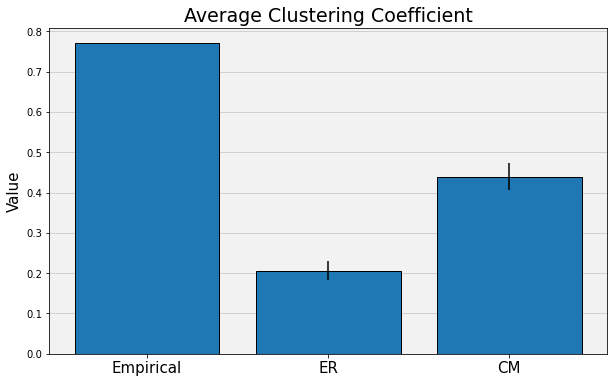

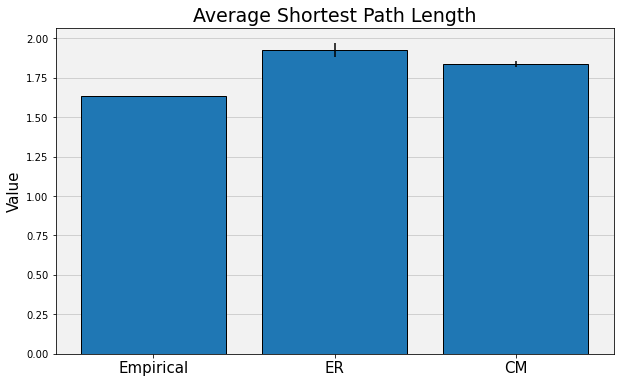

In [98]:
#Comparing the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(["Empirical", "ER", "CM"], [avg_cc, er_avg_clus_coef, cm_avg_clus_coef], yerr=[0, er_std_clus_coef, cm_std_clus_coef], color="#1f77b4", edgecolor = 'black', zorder=2 )
ax.set_title("Average Clustering Coefficient", fontsize = 19)
ax.set_ylabel("Value", fontsize = 15)
plt.grid(b=True, which='major', axis='y', linewidth=0.5, zorder=1)
ax.set_facecolor('#f2f2f2')
plt.xticks(fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(["Empirical", "ER", "CM"], [avg_spl, er_avg_short_path, cm_avg_short_path], yerr=[0, er_std_short_path, cm_std_short_path], color="#1f77b4", edgecolor = 'black', zorder=2)
ax.set_title("Average Shortest Path Length", fontsize = 19)
ax.set_ylabel("Value", fontsize = 15)
plt.grid(b=True, which='major', axis='y', linewidth=0.5, zorder=1)
ax.set_facecolor('#f2f2f2')
plt.xticks(fontsize=15)
plt.show()